In [1]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
from dataset.raw_data import private_train_data
from dataset import PrivateDataModule
from dataset import PrivateDataset
from hydra import initialize, compose
import matplotlib.pyplot as plt

/home/hoang/.local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/hoang/.local/lib/python3.9/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/hoang/.local/lib/python3.9/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
with initialize(version_base=None, config_path="../config/model/"):
  cfg = compose(config_name="aqf.yaml")

In [3]:
dtm = PrivateDataModule("/home/hoang/Documents/CodeSpace/air-quality-forecasting/private-data",
    cfg.data.normalize_mean,
    cfg.data.normalize_std,
    batch_size=8
)

In [2]:
data = private_train_data("/home/hoang/Documents/CodeSpace/air-quality-forecasting/private-data/train")

In [7]:
data["air"]

dict_keys(['S0000457-Nguyen Che Nghia', 'S0000210-Truong THCS Yen So', 'S0000349-Ecohome Phuc Loi', 'S0000370-Ba Trieu', 'S0000588-Truong THCS Ngo Si Lien', 'S0000399-Truong Mam non Thuc hanh Hoa Sen', 'S0000531- Minh Tri', 'S0000347- Gamuda Gardens ', 'S0000509-Van Phu', 'S0000403-Truong THCS PASCAL', 'S0000148-TT doi moi CN - CNC Hoa Lac', 'S0000551-Truong Mam non Viet - Bun', 'S0000169-Ngoc Thuy', 'S0000289- Nhan Chinh', 'S0000319-Bat Trang', 'S0000328-Luong The Vinh', 'S0000497-Chuyen My', 'S0000331-Truong THCS Le Quy Don', 'S0000157-Truong Mam non GCA Ecolife Capitol', 'S0000611-Nguyen Ngoc Vu', 'S0000621-Truong Pho Thong Lien Cap Sinh Thai EraSchool', 'S0000336-Truong THCS Nguyen Trai', 'S0000554-Truong Mam Non Thuc hanh Hoa Hong', 'S0000137-Ngoc Khanh', 'S0000630-Truong Tieu hoc Thi tran Soc Son', 'S0000310-Hang Trong', 'S0000475-Chung cu A1 - KDT Ha Dinh', 'S0000547-Phu Dong', 'S0000624-Cong ty co phan cong nghe MobiFone toan cau', 'S0000136-Linh Dam', 'S0000504-Le Trong Tan', 

In [3]:
from utils.functional import haversine_distance

a2a = []
m2a = []

for name, air_station in data["air"].items():
    for meteo_station in data["meteo"].values():
        m2a.append(
            haversine_distance(air_station["loc"], meteo_station["loc"])
        )

    for tmp_name, tmp_air in data["air"].items():
        if tmp_name != name:
            a2a.append(
                haversine_distance(air_station["loc"], tmp_air["loc"])
            )

In [7]:
locs = []
names = []
for name, station in data["air"].items():
    locs.append(station["loc"])
    names.append(name)

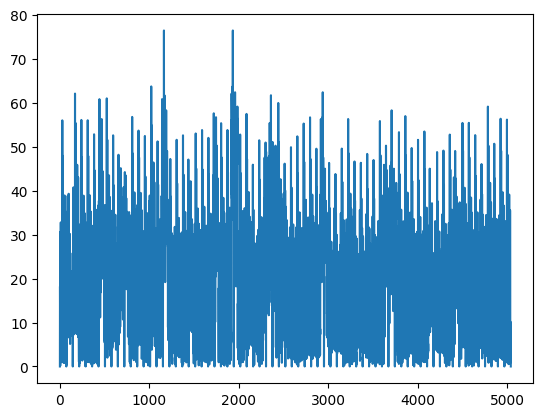

In [8]:
from utils.functional import haversine_distance
import matplotlib.pyplot as plt

dists = []

for loc1 in locs:
    for loc2 in locs:
        dist = haversine_distance(loc1, loc2)
        dists.append(dist)

plt.plot(dists)

<AxesSubplot:ylabel='Density'>

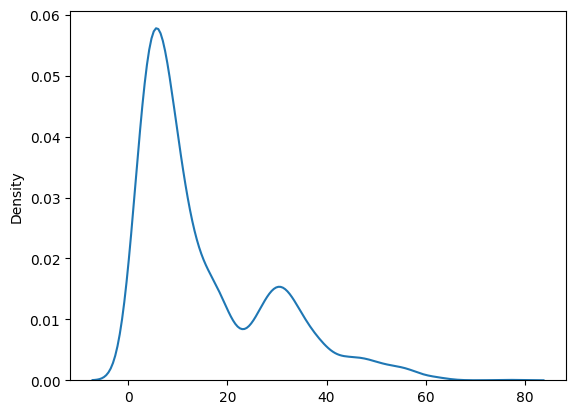

In [6]:
import seaborn as sns

# sns.kdeplot(m2a)
sns.kdeplot(a2a)